## Jupyter notebook for the 1st experiment: Width of a laser beam with a Gaussian spread

In [1]:
#import relevant libraries
import csv
import pandas as pd
import math
import numpy as np
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import random
from lmfit import Model

In [4]:
read=pd.read_csv("./Downloads/Gaussian Beam - Rajnil_Analysis_Copy_D=20.csv")
print(read)

FileNotFoundError: [Errno 2] No such file or directory: './Downloads/Gaussian Beam - Rajnil_Analysis_Copy_D=20.csv'

In [3]:
reading=[]
distance=[]

for i in read["TR"]:
    distance.append(i)
print(distance)

for i in read["Current "]:
    reading.append(i)
print(reading)

[0.665, 0.68, 0.696, 0.708, 0.75, 0.8, 0.855, 0.881, 0.912, 0.935, 1.055, 1.147, 1.16, 1.203, 1.26, 1.303, 1.358, 1.397, 1.425, 1.47, 1.51, 1.52, 1.605, 1.663, 1.721, 1.782, 1.822, 1.866]
[23.4, 23.7, 23.3, 23.0, 21.5, 20.6, 19.0, 18.3, 17.6, 17.4, 15.5, 14.3, 13.6, 12.5, 12.2, 11.1, 10.1, 9.3, 9.4, 8.2, 7.8, 5.9, 5.2, 5.2, 4.7, 3.3, 2.7, 2.6]


0.3218856103462079 1.019674875484228


/tmp/ipykernel_170365/1903202984.py:10: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x-x0)**2/(2*sigma**2))


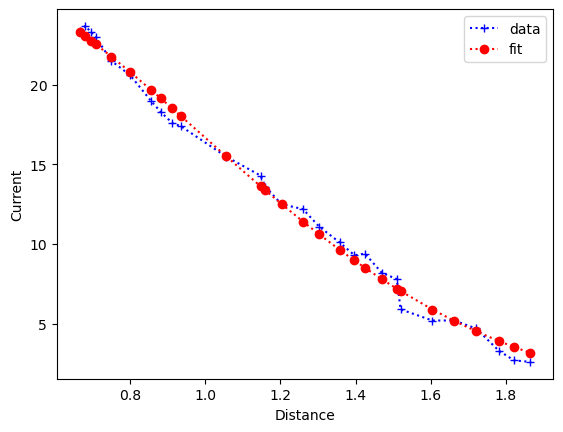

In [7]:
x = np.array(distance)
y =np.array(reading)

n = len(x)                          #the number of data
mean = sum(x * y) / sum(y)                  #note this correction
sigma=np.sqrt(sum(y * (x - mean)**2) / sum(y))  #note this correction
print(sigma,mean)

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Current')
plt.isinteractive
plt.show()

[-0.015 -0.03  -0.046 -0.058 -0.1   -0.15  -0.205 -0.231 -0.262 -0.285
 -0.405 -0.497 -0.51  -0.553 -0.61  -0.653 -0.708 -0.747 -0.775 -0.82
 -0.86  -0.87  -0.955 -1.013 -1.071 -1.132 -1.172 -1.216]
28
[-1.216 -1.172 -1.132 -1.071 -1.013 -0.955 -0.87  -0.86  -0.82  -0.775
 -0.747 -0.708 -0.653 -0.61  -0.553 -0.51  -0.497 -0.405 -0.285 -0.262
 -0.231 -0.205 -0.15  -0.1   -0.058 -0.046 -0.03  -0.015]
[ 2.6  2.7  3.3  4.7  5.2  5.2  5.9  7.8  8.2  9.3  9.4 10.1 11.1 12.2
 12.5 13.6 14.3 15.5 17.4 17.6 18.3 19.  20.6 21.5 23.  23.3 23.4 23.7
 23.4 23.7 23.3 23.  21.5 20.6 19.  18.3 17.6 17.4 15.5 14.3 13.6 12.5
 12.2 11.1 10.1  9.3  9.4  8.2  7.8  5.9  5.2  5.2  4.7  3.3  2.7  2.6]
0.4901669955123316 1.0099612617612168e-05


/tmp/ipykernel_170365/2976538471.py:19: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x-x0)**2/(2*sigma**2))


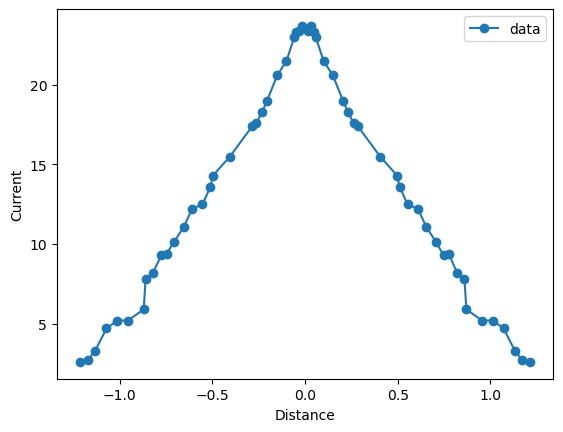

In [8]:
# generates the mirror: if this code cell is run once, do not run it again without running the previous code cell.
# This is because I am modifying the global variable x (which is anumpy array), changing it's shape
# and using it here again (I did not define a new variable), which causes issues when trying to combine with y,
# which is of the same shape as before

x_new_1=(x-(0.65))
x_new=x_new_1*(-1)
print(x_new)
print(len(x_new_1))
x_new=np.sort(x_new)
reading_sorted=np.sort(reading)
print(x_new)
reading_1=np.append(reading_sorted,reading)
print(reading_1)
x=np.append(x_new,x_new_1)
y =np.array(reading_1)

n = len(x)                          #the number of data
mean = sum(x * y) / sum(y)                  #note this correction
sigma=np.sqrt(sum(y * (x - mean)**2) / sum(y))  #note this correction
print(sigma,mean)

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'o-',label='data')
#plt.plot(x,gaus(x,*popt),label='fit')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Current')
plt.isinteractive
plt.show()

[-1.19 -1.17 -1.08 -1.05 -0.98 -0.94 -0.82 -0.81 -0.79 -0.75 -0.72 -0.66
 -0.62 -0.58 -0.53 -0.46 -0.45 -0.38 -0.28 -0.24 -0.2  -0.19 -0.15 -0.08
 -0.05 -0.02  0.01 -0.    0.02  0.03  0.05  0.06  0.1   0.15  0.2   0.23
  0.26  0.29  0.4   0.5   0.51  0.55  0.61  0.65  0.71  0.75  0.78  0.82
  0.86  0.87  0.96  1.01  1.07  1.13  1.17  1.22]
[ 3.63  2.82  3.54  5.5   5.43  5.71  6.64  7.93  8.78  9.86  9.87 10.16
 11.83 12.47 13.61 14.57 14.55 16.33 18.08 17.89 18.99 19.7  20.9  21.72
 24.13 23.66 24.27 24.88 24.09 24.   24.14 23.58 21.61 21.75 19.66 18.39
 18.25 17.6  16.6  14.31 13.72 13.41 13.27 11.44 11.23 10.58  9.5   8.4
  8.02  6.89  6.31  6.44  5.96  3.75  3.16  3.58]
0.49009020387873964 0.017086343763621288


/tmp/ipykernel_170365/3137194605.py:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x_1-x0)**2/(2*sigma**2))


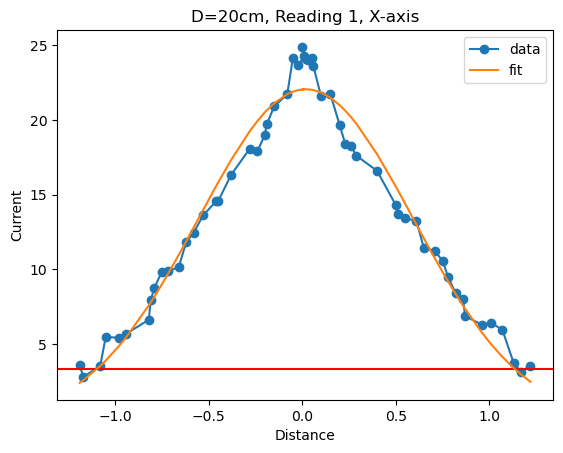

3.3588
22.04863834325821 0.019349648783510927 0.5751393028926342
[[ 8.55903607e-02  4.20998200e-05 -1.59371519e-03]
 [ 4.20998200e-05  1.06895877e-04 -4.76514951e-07]
 [-1.59371519e-03 -4.76514951e-07  1.05971862e-04]]


In [9]:
def rand_func(n,u):
    rand=np.zeros((56))
    for i in range (0,n):
        rand[i]=random.uniform(0.0,u)
    return np.array(rand)

x_1=x+rand_func(28,0.05)
y_1=reading_1+rand_func(56,1.3)

x_1=np.round(x_1,2)
y_1=np.round(y_1,2)

print(x_1)
print(y_1)

lower_bounds = [0, -np.inf, 0]  # Lower bounds: [a, x0, sigma]
upper_bounds = [np.inf, np.inf, np.inf]  # Upper bounds

n = len(x_1)                          #the number of data
mean = sum(x_1 * y_1) / sum(y_1)                  #note this correction
sigma=np.sqrt(sum(y_1 * (x_1 - mean)**2) / sum(y_1))  #note this correction
print(sigma,mean)

def gaus(x_1,a,x0,sigma):
    return a*exp(-(x_1-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x_1,y_1,p0=[25,mean,sigma],bounds=(lower_bounds, upper_bounds))

# def file_reader():
#     try:
#         file=open("./Documents/Gaussian_Reading__1_x_D_20.txt","x")
#     except:
#         print("Error")
#     file.write(x_1,y_1)
#     file.flush()
#     file.close()

plt.plot(x_1,y_1,'o-',label='data')
plt.axhline(y=np.max(y_1)*0.135, color = 'r', linestyle = '-')
plt.plot(x_1,gaus(x_1,*popt),label='fit')
plt.title("D=20cm, Reading 1, X-axis")
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Current')
plt.show()

print(np.max(y_1)*0.135)
print(*popt)
print(pcov)


In [10]:
# Number of bootstrap iterations
n_bootstrap = 1000

# Initialize arrays to store bootstrapped parameter values
bootstrapped_means = []
bootstrapped_sigmas = []

# Perform bootstrap resampling
for _ in range(n_bootstrap):
    # Generate random indices for resampling with replacement
    indices = np.random.randint(0, len(x_1), len(x_1))
    x_bootstrap = x_1[indices]
    y_bootstrap = y_1[indices]
    
    # Fit the Gaussian model to the bootstrapped data
    popt_bootstrap, _ = curve_fit(gaus, x_bootstrap, y_bootstrap, p0=[25, np.mean(x_bootstrap), np.std(x_bootstrap)])
    
    # Store the bootstrapped parameter values
    bootstrapped_means.append(popt_bootstrap[1])
    bootstrapped_sigmas.append(popt_bootstrap[2])

# Calculate the standard deviation of the bootstrapped parameter distributions
mean_error = np.std(bootstrapped_means)
sigma_error = np.std(bootstrapped_sigmas)

print("Error in mean:", mean_error)
print("Error in standard deviation:", sigma_error)

/tmp/ipykernel_170365/3137194605.py:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x_1-x0)**2/(2*sigma**2))


Error in mean: 0.008690419419886606
Error in standard deviation: 0.009292018112680168


In [12]:
import numpy as np
from scipy.optimize import fsolve

# Define the Gaussian function
def gaus(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Parameters from the Gaussian fit
a, x0, sigma = popt  # Replace popt with your actual parameter values

# Define the straight line equation
def straight_line(x):
    return np.max(y_1) * 0.135

# Define the equation to find the intersection points
def equation_to_solve(x):
    return gaus(x, a, x0, sigma) - straight_line(x)

# Initial guesses for the intersection points (where the Gaussian is likely to intersect the line)
x_guesses = [x0 - 2 * sigma, x0 + 2 * sigma]

# Find the roots (intersection points) using fsolve
intersection_points = fsolve(equation_to_solve, x_guesses)

print("Intersection points:", intersection_points)

Intersection points: [-1.09638119  1.13508049]


## Results obtained from the code:

### D=20 cm, 1st reading, X-Axis:

The straight line equation is: $y=3.3534$

The amplitude, mean and standard deviation is: 22.09965415868953 0.008980670586373859 0.5696168387736557

Error in mean: 0.008124452724752542

Error in standard deviation: 0.009008958955354522

Intersection points: [-1.09718742  1.11514877]

### D=20 cm, 1st Reading, Y-Axis:

The straight line equation is: $y=3.3547500000000006$

The amplitude, mean and standard deviation is: 23.616464299143555 0.031260189405205994 0.8036546771080376

Error in mean: 0.008597674060759779

Error in standard deviation: 0.007785244092999443

Intersection points: [-1.55646813  1.61898851]

### D=20 cm, 2nd reading, X-Axis:

The straight line equation is: $y=3.2589$

The amplitude, mean and standard deviation is: 23.49913187775101 0.018088765393243052 0.589594715286393

Error in mean: 0.0097119082874781

Error in standard deviation: 0.009378236738498136

Intersection points: [-1.15387775  1.19005528]

### D=20 cm, 2nd reading, Y-Axis:

The straight line equation is: $y=3.3763500000000004$

The amplitude, mean and standard deviation is: 24.392562652800493 0.012882987850759427 0.7492341690755866

Error in mean: 0.007761183306575467

Error in standard deviation: 0.008565072712555084

Intersection points: [-1.47712623  1.50289221]

### D=20 cm, 3rd reading, X-Axis:

The straight line equation is: $y=3.3399$

The amplitude, mean and standard deviation is: 21.591893365512604 0.01023336416340606 0.5633833727960451

Error in mean: 0.008907128324271216

Error in standard deviation: 0.010004203620904928

Intersection points: [-1.07824229  1.09870902]

### D=20 cm, 3rd reading, Y-Axis:

The straight line equation is: $y=3.2319000000000004$

The amplitude, mean and standard deviation is: 22.676430789967647 0.029844747415561073 0.7640064819913661

Error in mean: 0.011677912565688687

Error in standard deviation: 0.011804307261959352

Intersection points: [-1.47827227  1.53796176]